In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import mahalanobis
from sklearn.svm import SVC
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D

In [23]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
val=pd.read_csv("val.csv")
train.drop(columns=["Unnamed: 0"],inplace=True)
test.drop(columns=["Unnamed: 0"],inplace=True)
val.drop(columns=["Unnamed: 0"],inplace=True)

In [24]:
scaler = StandardScaler()
x_train=train.drop(columns=["species"])
y_train=train["species"]

x_test=test.drop(columns=["species"])
y_test=test["species"]

x_val=val.drop(columns=["species"])
y_val=val["species"]

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_val=scaler.transform(x_val)

In [25]:
val_accuracy=[]
nearest_neighbours=[1,3,5,7,9,11,13,15,17,19,23,29]
for i in nearest_neighbours:
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(x_train,y_train)
    y_val_pred=knn.predict(x_val) 
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred, average='macro')
    recall = recall_score(y_val, y_val_pred, average='macro')
    print("the results on test data for number of neighbors =",i)
    print("Confusion Matrix:\n", conf_matrix)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    val_accuracy.append(accuracy)


    

the results on test data for number of neighbors = 1
Confusion Matrix:
 [[95  0  0  0  0  0  0  0  0]
 [ 0 83  0  0  0  0  0  0  0]
 [ 0  0 68  0  0  0  0 26  0]
 [ 0  0  0 86  0  0  0  1  0]
 [ 0  0  0  0 95  0  0  0  0]
 [ 0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0 84  0  0]
 [ 0  0 35  0  0  0  0 61  0]
 [ 0  0  0  0  0  0  0  0 91]]
Accuracy: 0.9240196078431373
Precision: 0.9281528881043444
Recall: 0.9274807410124725
the results on test data for number of neighbors = 3
Confusion Matrix:
 [[95  0  0  0  0  0  0  0  0]
 [ 0 83  0  0  0  0  0  0  0]
 [ 0  0 73  0  0  0  0 21  0]
 [ 0  0  0 86  0  0  0  1  0]
 [ 0  0  0  0 95  0  0  0  0]
 [ 0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0 84  0  0]
 [ 0  0 28  0  0  0  0 68  0]
 [ 0  0  0  0  0  0  0  0 91]]
Accuracy: 0.9387254901960784
Precision: 0.9420364258648087
Recall: 0.941492758348958
the results on test data for number of neighbors = 5
Confusion Matrix:
 [[95  0  0  0  0  0  0  0  0]
 [ 0 82  0  1  0  0  0  0  0]
 [ 0  0 73 

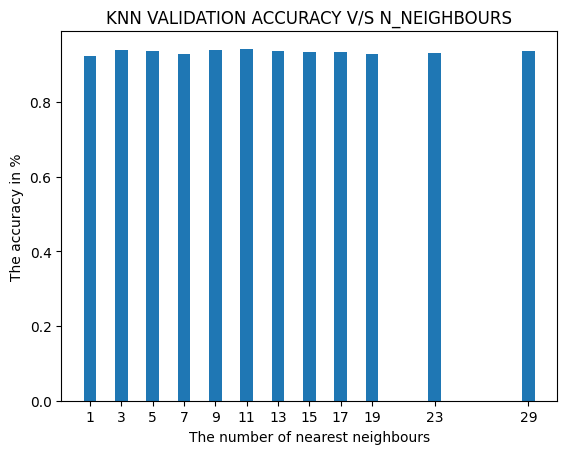

11

In [26]:
plt.bar(nearest_neighbours,val_accuracy)
plt.xticks(nearest_neighbours)
plt.title("KNN VALIDATION ACCURACY V/S N_NEIGHBOURS")
plt.xlabel("The number of nearest neighbours")
plt.ylabel("The accuracy in %")
plt.savefig("KNN_VALIDATION_ACCURACY_N_NEIGHBOURS.png", dpi=300, bbox_inches='tight')
plt.show()


best_n_neighbours=nearest_neighbours[val_accuracy.index(max(val_accuracy))]
best_n_neighbours

### BEST KNN 

In [27]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbours) 
knn.fit(x_train,y_train)
y_test_pred=knn.predict(x_test) 
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
print("the results on test data for number of neighbors =",i)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


the results on test data for number of neighbors = 29
Confusion Matrix:
 [[96  0  0  0  0  0  0  0  0]
 [ 0 83  0  0  0  0  0  0  0]
 [ 0  0 67  0  0  0  0 26  0]
 [ 0  0  0 87  0  0  0  0  0]
 [ 0  0  0  0 95  0  0  0  0]
 [ 0  0  0  0  0 92  0  0  0]
 [ 0  0  0  0  0  0 83  0  0]
 [ 0  0 24  0  0  0  0 72  0]
 [ 0  0  0  0  0  0  0  0 91]]
Accuracy: 0.9387254901960784
Precision: 0.9412175126460842
Recall: 0.9411589008363203
